In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ranksums
import warnings
warnings.filterwarnings('ignore')

In [8]:
data_dir = '/data/yuchen_data/Stereo_seq/All_Figures/Figure3_v2/'
df_used_tls = pd.read_csv(f'{data_dir}/hcc-rhcc-tls0513-bySGW.txt', index_col=0, sep='\t')
used_tls = set(df_used_tls.index)

In [9]:
dic_tls = {}
for i in used_tls:
    if i.split('_')[0] not in dic_tls:
        dic_tls[i.split('_')[0]] = [i]
    else:
        dic_tls[i.split('_')[0]].append(i)

In [10]:
HCC_meta_path = f"{data_dir}/HCC_metadata_Final/"

all_cts = ['B', 'Plasma', 'T', 'Myeloid']
df_ct = pd.DataFrame(index=all_cts)
for sample, tls_s in dic_tls.items():
    # if sample.endswith('T'):
    if not sample.startswith('STRH'):
        df = pd.read_csv(f'{HCC_meta_path}/{sample}_metadata_final.txt', index_col=0, sep='\t')
        df = df[df['SpotLight_Anno'].isin(all_cts)]
        for tls in tls_s:
            df_cur = df[df['TLS'] == tls]
            c = Counter(df_cur['SpotLight_Anno'])
            df_ct[tls] = df_ct.index.map(c)

In [11]:
df_ct_rhcc = pd.DataFrame(index=all_cts)
rhcc_meta_path = f'{data_dir}/RHCC_metadata_Final/'
for sample, tls_s in dic_tls.items():
    if sample.startswith('STRH'):
        df = pd.read_csv(f'{rhcc_meta_path}/{sample}_metadata_230509.txt', index_col=0, sep='\t')
        df = df[df['SpotLight_Anno'].isin(all_cts)]
        for tls in tls_s:
            df_cur = df[df['TLS'] == tls]
            c = Counter(df_cur['SpotLight_Anno'])
            df_ct_rhcc[tls] = df_ct_rhcc.index.map(c)


In [14]:
df_group = pd.read_csv(f'{data_dir}/TLS_group.1125.txt', index_col=0, sep='\t')
dic_group = dict(zip(df_group.index, df_group['Group']))

df_group_1 = pd.read_csv(f'{data_dir}/RHCC_TLS_group.0506.v2.txt', index_col=0, sep='\t')
dic_group_1 = dict(zip(df_group_1.index, df_group_1['Group']))
dic_group.update(dic_group_1)

In [15]:
df_ct = df_ct.T
df_ct['Group'] = df_ct.index.map(dic_group)
df_ct['Cohort'] = 'Pre'

df_ct_rhcc = df_ct_rhcc.T
df_ct_rhcc['Group'] = df_ct_rhcc.index.map(dic_group_1)
df_ct_rhcc['Cohort'] = 'Post'

df_merge = pd.concat((df_ct, df_ct_rhcc))
dic_rename = {'Developing': 'Conforming', 'NotMature': 'Deviating', 'Mature': 'Mature', 'deviating': 'Deviating', 'conforming': 'Conforming'}
df_merge['Group'] = df_merge['Group'].map(dic_rename)


In [16]:
#### 计算比例
df_merge['Final_group'] = df_merge['Cohort'] + '_' + df_merge['Group']
ratio_t = []
ratio_b = []
for idx, row in df_merge.iterrows():
    cur_sum = row.iloc[:4].sum()
    cur_t = row['T']
    cur_b = row['B']
    ratio_t.append(cur_t / cur_sum)
    ratio_b.append(cur_b / cur_sum)
df_merge['Ratio_T'] = ratio_t
df_merge['Ratio_B'] = ratio_b
g1 = df_merge[df_merge['Final_group'] == 'Pre_Conforming']['Ratio_T']
g2 = df_merge[df_merge['Final_group'] == 'Post_Conforming']['Ratio_T']

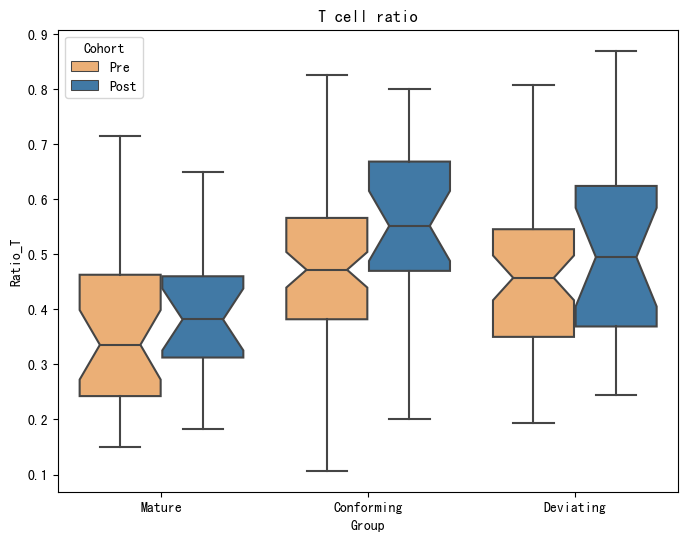

In [18]:
# boxplot
dic_colors = {'Pre': '#FEAE63', 'Post': '#307BB6'}
plot_order = ['Mature', 'Conforming', 'Deviating']
plt.figure(figsize=(8, 6))
sns.boxplot(x="Group", y='Ratio_T', data=df_merge, order=plot_order, hue='Cohort', palette=dic_colors, hue_order=['Pre', 'Post'], notch=True, showfliers=False)
plt.title('T cell ratio')
plt.show()

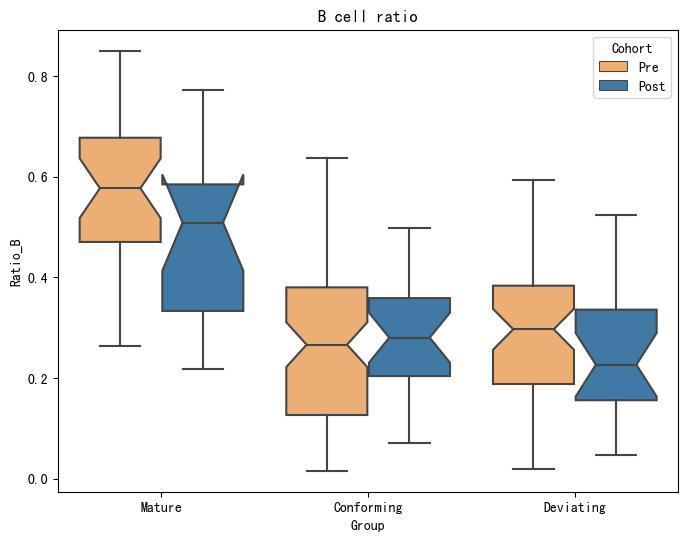

In [19]:
dic_colors = {'Pre': '#FEAE63', 'Post': '#307BB6'}
plot_order = ['Mature', 'Conforming', 'Deviating']
plt.figure(figsize=(8, 6))
sns.boxplot(x="Group", y='Ratio_B', data=df_merge, order=plot_order, hue='Cohort', palette=dic_colors, hue_order=['Pre', 'Post'], notch=True, showfliers=False)
plt.title('B cell ratio')
plt.show()